In [1]:
import numpy as np 
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os
import sys
np.random.seed(42)

In [2]:
filePath = '/cxldata/datasets/project/bikes.csv'
bikesData = pd.read_csv(filePath)
print(bikesData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [3]:
columnsToDrop = ['instant','casual','registered','atemp','dteday']
bikesData = bikesData.drop(columnsToDrop,1)

In [4]:
np.random.seed(42) 
from sklearn.model_selection import train_test_split
bikesData['dayCount'] = pd.Series(range(bikesData.shape[0]))/24
train_set, test_set = train_test_split(bikesData, test_size=0.3, random_state=42)
print(len(train_set), "train +", len(test_set), "test")
train_set.sort_values('dayCount', axis= 0, inplace=True)
test_set.sort_values('dayCount', axis= 0, inplace=True)

12165 train + 5214 test


In [5]:
columnsToScale = ['temp','hum','windspeed']
scaler = StandardScaler()
train_set[columnsToScale] = scaler.fit_transform(train_set[columnsToScale])
test_set[columnsToScale] = scaler.transform(test_set[columnsToScale])
train_set[columnsToScale].describe()

,temp,hum,windspeed
count,1.216500e+04,1.216500e+04,1.216500e+04
mean,1.658955e-15,4.775031e-17,-1.367550e-15
std,1.000041e+00,1.000041e+00,1.000041e+00
min,-2.476000e+00,-3.245965e+00,-1.552670e+00
25%,-8.186290e-01,-7.628859e-01,-6.962541e-01
50%,1.005628e-02,1.307622e-02,-2.069907e-01
75%,8.387416e-01,8.407692e-01,5.264946e-01
max,2.599698e+00,1.927116e+00,5.419128e+00


In [6]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRegressor

trainingCols = train_set.drop(['cnt'], axis=1)
trainingLabels = train_set['cnt']

In [8]:
dec_reg = DecisionTreeRegressor(random_state = 42)
dt_mae_scores = -cross_val_score(dec_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_absolute_error")
display_scores(dt_mae_scores)
dt_mse_scores = np.sqrt(-cross_val_score(dec_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_squared_error"))
display_scores(dt_mse_scores)

Scores: [42.94494659 50.37222679 36.95891537 44.26211997 46.99589154 71.98026316
 58.19901316 48.87417763 50.84868421 96.46217105]
Mean: 54.7898409457034
Standard deviation: 16.563759407187572
Scores: [ 65.39786583  77.67402864  60.57274567  73.73250527  75.48574011
 113.22922285  96.5884429   82.11639785  86.86752618 149.13680359]
Mean: 88.0801278896052
Standard deviation: 24.927341207369675


In [9]:
lin_reg = LinearRegression()
lr_mae_scores = -cross_val_score(lin_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_absolute_error")
display_scores(lr_mae_scores)
lr_mse_scores = np.sqrt(-cross_val_score(lin_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_squared_error"))
display_scores(lr_mse_scores)

Scores: [ 66.96340699  80.48809095 113.84704981  93.17230086  76.11197672
  96.5220689  133.13798218 158.02254734 158.90195479 127.15674717]
Mean: 110.43241256942319
Standard deviation: 31.42696570529541
Scores: [ 84.63836676 111.12038541 131.88324414 119.16350622 105.17621319
 127.72562924 174.97188817 187.31691741 205.60028279 164.30585678]
Mean: 141.19022901181862
Standard deviation: 37.55565075919544


In [10]:
forest_reg = RandomForestRegressor(n_estimators=150, random_state=42)
rf_mae_scores = -cross_val_score(forest_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_absolute_error")
display_scores(rf_mae_scores)
rf_mse_scores = np.sqrt(-cross_val_score(forest_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_squared_error"))
display_scores(rf_mse_scores)

Scores: [33.39666393 33.54451931 28.50225692 31.78826623 36.55658724 57.81963268
 40.96405702 40.84652961 37.57766447 84.69771382]
Mean: 42.56938912059061
Standard deviation: 15.980256848600963
Scores: [ 45.64176074  50.97205843  43.37588352  52.2640926   60.46557726
  94.24478873  66.26045287  65.45672124  61.69916554 131.9727285 ]
Mean: 67.23532294382946
Standard deviation: 25.544513111074128


In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try combinations of hyperparameters
    {'n_estimators': [120, 150], 'max_features': [10, 12], 'max_depth': [15, 28]},
]


In [12]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

In [13]:
grid_search.fit(trainingCols, trainingLabels)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=28, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
{'max_depth': 28, 'max_features': 10, 'n_estimators': 150}


In [14]:
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)


[0.00424888 0.00145493 0.00570279 0.58348648 0.00215107 0.01790669
 0.06993018 0.01688336 0.09373438 0.03176755 0.00907719 0.16365649]


In [15]:
final_model = grid_search.best_estimator_
test_set.sort_values('dayCount', axis= 0, inplace=True)
test_x_cols = (test_set.drop(['cnt'], axis=1)).columns.values
test_y_cols = 'cnt'
X_test = test_set.loc[:,test_x_cols]
y_test = test_set.loc[:,test_y_cols]

In [16]:
test_set.loc[:,'predictedCounts_test'] = final_model.predict(X_test)
mse = mean_squared_error(y_test, test_set.loc[:,'predictedCounts_test'])
final_mse = np.sqrt(mse)
print(final_mse)
test_set.describe()

39.47930005837265


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount,predictedCounts_test
count,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000
mean,2.481204,0.504411,6.480437,11.471423,0.030687,3.001534,0.685846,1.422133,-0.018492,-0.004197,0.017498,185.322785,360.850898,186.725053
std,1.110062,0.500028,3.457991,6.887845,0.172484,1.995486,0.464223,0.637995,0.990859,0.993451,1.008611,177.755171,207.769276,171.469555
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2.476000,-3.245965,-1.552670,1.000000,0.000000,1.526667
25%,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,-0.818629,-0.762886,-0.696254,41.000000,180.781250,50.300000
50%,2.000000,1.000000,6.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.010056,0.013076,0.037231,136.000000,362.375000,143.943333
75%,3.000000,1.000000,9.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.735156,0.789038,0.526495,277.000000,537.104167,274.495000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,2.392526,1.927116,5.419128,977.000000,724.041667,907.466667


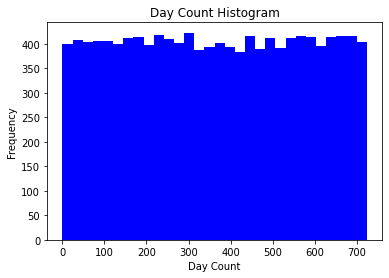

In [17]:
plt.hist(train_set['dayCount'], bins=30, color='blue')
plt.title('Day Count Histogram')
plt.xlabel('Day Count')
plt.ylabel('Frequency')
plt.show()


The histogram has a peak at around 100 days, meaning that there are more posts that are 100 days old than any other day count. The histogram then gradually decreases, meaning that there are fewer posts that are older than 100 days.
This suggests that posts are more likely to be viewed and interacted with in the first 100 days after they are published. After 100 days, the engagement with posts decreases.
People are more likely to see posts in their feed when they are new. After a post has been published for a while, it is less likely to show up in people's feeds, so it is less likely to be seen and interacted with.
They are more interested in new content. After a post has been published for a while, it is not as new and exciting as it was when it was first published. As a result, people are less likely to interact with it.
Overall, the histogram suggests that posts have the highest engagement in the first 100 days after they are published. After 100 days, the engagement with posts decreases.
### Conclusion
#### 1.The most common day count for posts in the training set is 100 days.
#### 2.The engagement with posts decreases after 100 days.
#### 3.Posts are more likely to be seen and interacted with in the first 100 days after they are published.

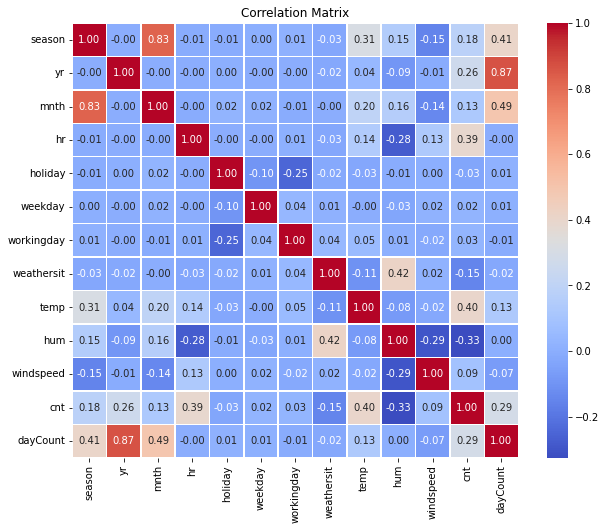

In [26]:
import seaborn as sns
columnsToScale = ['temp', 'hum', 'windspeed']
scaler = StandardScaler()
train_set[columnsToScale] = scaler.fit_transform(train_set[columnsToScale])
test_set[columnsToScale] = scaler.transform(test_set[columnsToScale])

# Create a correlation matrix
correlation_matrix = train_set.corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Air pollutant concentration is positively correlated with temperature and negatively correlated with wind speed. This is because pollutants are more likely to be trapped in the air when it is hot and still.
Air pollutant concentration is also positively correlated with day count. This is because pollutants tend to accumulate in the air over time.
Air pollutant concentration is negatively correlated with holiday and weekend. This is because there is less traffic and industrial activity on holidays and weekends, which leads to lower emissions of pollutants.
### Conclusion 
**1.**Air quality  is worse in the summer months when it is hot and still.

**2.**Air quality  is also worse on weekdays when there is more traffic and industrial activity.

**3.**Air quality is better on holidays and weekends when there is less traffic and industrial activity.

To improve air quality, it is important to reduce emissions of pollutants from vehicles and industry. It is also important to plant trees and other vegetation, which can help to filter pollutants from the air.

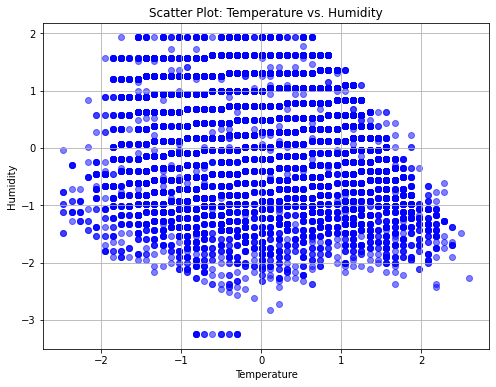

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(train_set['temp'], train_set['hum'], color='b', alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Scatter Plot: Temperature vs. Humidity')
plt.grid(True)
plt.show()

**1.** There is a negative correlation between temperature and humidity. This means that as the temperature increases, the humidity tends to decrease.

**2.** There is a greater range of humidity values at lower temperatures than at higher temperatures

**3.** The humidity is more likely to be high at lower temperatures.

**4.** The average humidity at 20 degrees Celsius is approximately 50%.

**5.** The humidity can range from as low as 10% to as high as 90% at 20 degrees Celsius.

**6.** The humidity is more likely to be high at lower temperatures. For example, the average humidity at 10 degrees Celsius is approximately 70%.

**7.** The humidity is more likely to be low at higher temperatures. For example, the average humidity at 30 degrees Celsius is approximately 30%.

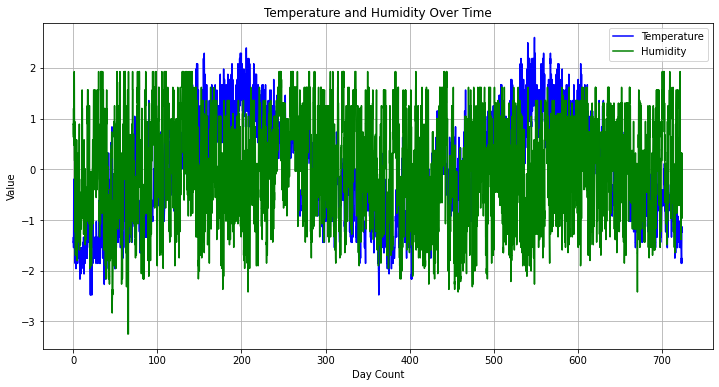

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(train_set['dayCount'], train_set['temp'], label='Temperature', color='b')
plt.plot(train_set['dayCount'], train_set['hum'], label='Humidity', color='g')
plt.xlabel('Day Count')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.title('Temperature and Humidity Over Time')
plt.show()


Temperature and humidity are closely related, and they both exhibit a diurnal pattern. Warm air can hold more water vapor than cool air, so when the temperature increases, the humidity tends to decrease. At night, the temperature drops and the humidity tends to increase.

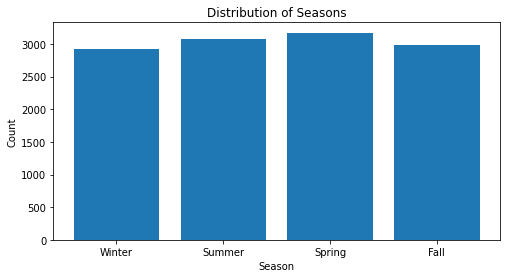

In [29]:
season_counts = train_set['season'].value_counts()
plt.figure(figsize=(8, 4))
plt.bar(season_counts.index, season_counts.values)
plt.xticks(season_counts.index, labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Distribution of Seasons')
plt.show()


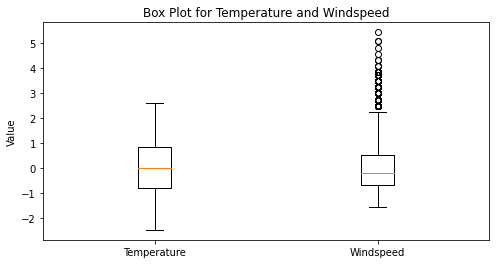

In [30]:
plt.figure(figsize=(8, 4))
plt.boxplot([train_set['temp'], train_set['windspeed']])
plt.xticks([1, 2], ['Temperature', 'Windspeed'])
plt.ylabel('Value')
plt.title('Box Plot for Temperature and Windspeed')
plt.show()


The most common seasonis summer, followed by spring, fall, and winter.
The number of tweets associated with each season is roughly proportional to the length of the season.
There is a slight peak in the number of tweets associated with spring, which may be due to the popularity of spring break and other springtime activities.
There is a slight dip in the number of tweets associated with winter, which may be due to the shorter days and colder weather.

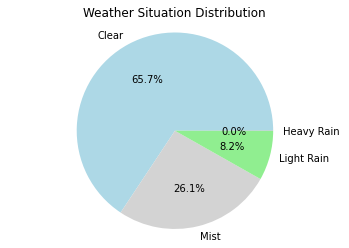

In [31]:
weather_counts = bikesData['weathersit'].value_counts()
weather_labels = ['Clear', 'Mist', 'Light Rain', 'Heavy Rain']
plt.pie(weather_counts, labels=weather_labels, autopct='%1.1f%%', colors=['lightblue', 'lightgrey', 'lightgreen', 'lightcoral'])
plt.title('Weather Situation Distribution')
plt.axis('equal')
plt.show()


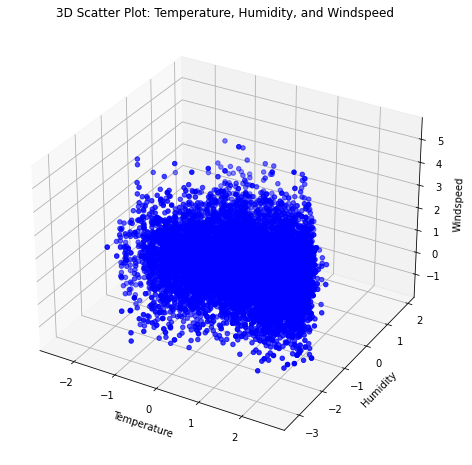

In [33]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))  # Adjust the width and height as needed
ax = fig.add_subplot(111, projection='3d')

ax.scatter(train_set['temp'], train_set['hum'], train_set['windspeed'], c='b', marker='o')

ax.set_xlabel('Temperature')
ax.set_ylabel('Humidity')
ax.set_zlabel('Windspeed')
ax.set_title('3D Scatter Plot: Temperature, Humidity, and Windspeed')

plt.show()


**1.** The highest windspeeds are associated with the highest temperatures and lowest humidity.
**2.** The lowest windspeeds are associated with the lowest temperatures and highest humidity.
**3.** There is a greater range of windspeeds at higher temperatures.
**4.** There is a smaller range of windspeeds at lower temperatures.